## Multiple outputs- Linear Regression

In [47]:
from torch import nn
import torch

In [48]:
torch.manual_seed(1)

In [49]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [50]:
model=linear_regression(1,10)
y = model(torch.tensor([1.0]))
print(y.shape)

torch.Size([10])


In [51]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

In [52]:
X=torch.tensor([[1.0],[1.0],[3.0]])
Yhat=model(X)
Yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward>)

In [53]:
Yhat.shape

torch.Size([3, 10])

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [55]:
torch.manual_seed(1)

In [56]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [57]:
data_set=Data()
print(data_set.x)
data_set.x.shape

tensor([[-1.0000, -1.0000],
        [-0.9000, -0.9000],
        [-0.8000, -0.8000],
        [-0.7000, -0.7000],
        [-0.6000, -0.6000],
        [-0.5000, -0.5000],
        [-0.4000, -0.4000],
        [-0.3000, -0.3000],
        [-0.2000, -0.2000],
        [-0.1000, -0.1000],
        [ 0.0000,  0.0000],
        [ 0.1000,  0.1000],
        [ 0.2000,  0.2000],
        [ 0.3000,  0.3000],
        [ 0.4000,  0.4000],
        [ 0.5000,  0.5000],
        [ 0.6000,  0.6000],
        [ 0.7000,  0.7000],
        [ 0.8000,  0.8000],
        [ 0.9000,  0.9000]])


torch.Size([20, 2])

In [58]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [59]:
model = linear_regression(2,2)

In [64]:
optimizer = optim.SGD(model.parameters(), lr = 0.05)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=data_set,batch_size=1)

In [65]:
LOSS=[]
 
epochs=10
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        print(yhat)
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

tensor([[-1.0005, -3.0005]], grad_fn=<AddmmBackward>)
tensor([[-0.8006, -2.8006]], grad_fn=<AddmmBackward>)
tensor([[-0.6005, -2.6005]], grad_fn=<AddmmBackward>)
tensor([[-0.4005, -2.4005]], grad_fn=<AddmmBackward>)
tensor([[-0.2005, -2.2005]], grad_fn=<AddmmBackward>)
tensor([[-3.2330e-04, -2.0003e+00]], grad_fn=<AddmmBackward>)
tensor([[ 0.1998, -1.8002]], grad_fn=<AddmmBackward>)
tensor([[ 0.3998, -1.6002]], grad_fn=<AddmmBackward>)
tensor([[ 0.5999, -1.4001]], grad_fn=<AddmmBackward>)
tensor([[ 0.8000, -1.2000]], grad_fn=<AddmmBackward>)
tensor([[ 1.0002, -0.9998]], grad_fn=<AddmmBackward>)
tensor([[ 1.2003, -0.7997]], grad_fn=<AddmmBackward>)
tensor([[ 1.4003, -0.5997]], grad_fn=<AddmmBackward>)
tensor([[ 1.6004, -0.3996]], grad_fn=<AddmmBackward>)
tensor([[ 1.8004, -0.1996]], grad_fn=<AddmmBackward>)
tensor([[2.0004e+00, 3.5590e-04]], grad_fn=<AddmmBackward>)
tensor([[2.2004, 0.2004]], grad_fn=<AddmmBackward>)
tensor([[2.4003, 0.4003]], grad_fn=<AddmmBackward>)
tensor([[2.6004, 0

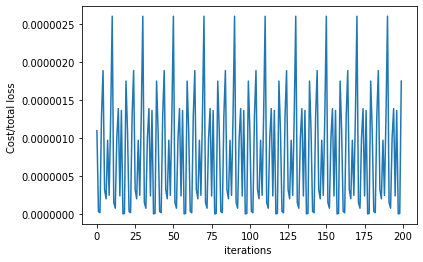

In [66]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [67]:
list(model.parameters())
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[1.3696, 0.6309],
                      [1.3159, 0.6847]])),
             ('linear.bias', tensor([ 1.0001, -0.9999]))])

In [26]:
data_set.w

tensor([[ 1., -1.],
        [ 1.,  3.]])